# 1. Análisis Exploratorio de Datos (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración para que los gráficos se vean mejor
#sns.set(style="whitegrid")


## 1.1.  Cargar y visualizar el dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weather_classification_data.csv to weather_classification_data (1).csv


In [ ]:
# Cargar los datos
df = pd.read_csv("weather_classification_data.csv")

# Mostrar las primeras filas
print(df.head())


   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


## 1.2. Información general del dataset

In [ ]:
# Ver estructura general
print("\nEstructura general: \n")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas: \n")
print(df.describe(include='all'))



Estructura general: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None

Estadísticas descriptivas: 

         Temperature      Humidity    Wind Speed  Precipitation (%)  \
count   13200.000000  13200.000000  1

## 1.3.  Detección y tratamiento de valores faltantes

In [ ]:
# Ver cantidad de valores faltantes por columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


## 1.4. Separación de variables en Cualitativas y Cuantitavivas

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include='object').columns

print("Variables numéricas:", list(numeric_columns))
print("Variables categóricas:", list(categorical_cols))

Variables numéricas: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
Variables categóricas: ['Cloud Cover', 'Season', 'Location', 'Weather Type']


In [ ]:
# Convertir numéricas a formato largo y agregar la variable target
df_num = df[numeric_columns]
df_num['Weather Type'] = df['Weather Type']  # Añadir target temporalmente
df_num = df_num.melt(id_vars='Weather Type', var_name='variable', value_name='value')

# Convertir categóricas a formato largo y agregar la variable target
df_cat = df[categorical_cols]
df_cat['Weather Type'] = df['Weather Type']  # Añadir target temporalmente
df_cat = df_cat.melt(id_vars='Weather Type', var_name='variable', value_name='value')

<ipython-input-8-3dbdc229da31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Weather Type'] = df['Weather Type']  # Añadir target temporalmente
<ipython-input-8-3dbdc229da31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Weather Type'] = df['Weather Type']  # Añadir target temporalmente


In [ ]:
print(df_num.head())

  Weather Type     variable  value
0        Rainy  Temperature   14.0
1       Cloudy  Temperature   39.0
2        Sunny  Temperature   30.0
3        Sunny  Temperature   38.0
4        Rainy  Temperature   27.0


In [ ]:
print(df_cat.head())

  Weather Type     variable          value
0        Rainy  Cloud Cover  partly cloudy
1       Cloudy  Cloud Cover  partly cloudy
2        Sunny  Cloud Cover          clear
3        Sunny  Cloud Cover          clear
4        Rainy  Cloud Cover       overcast


## 1.5. Análisis Univariado

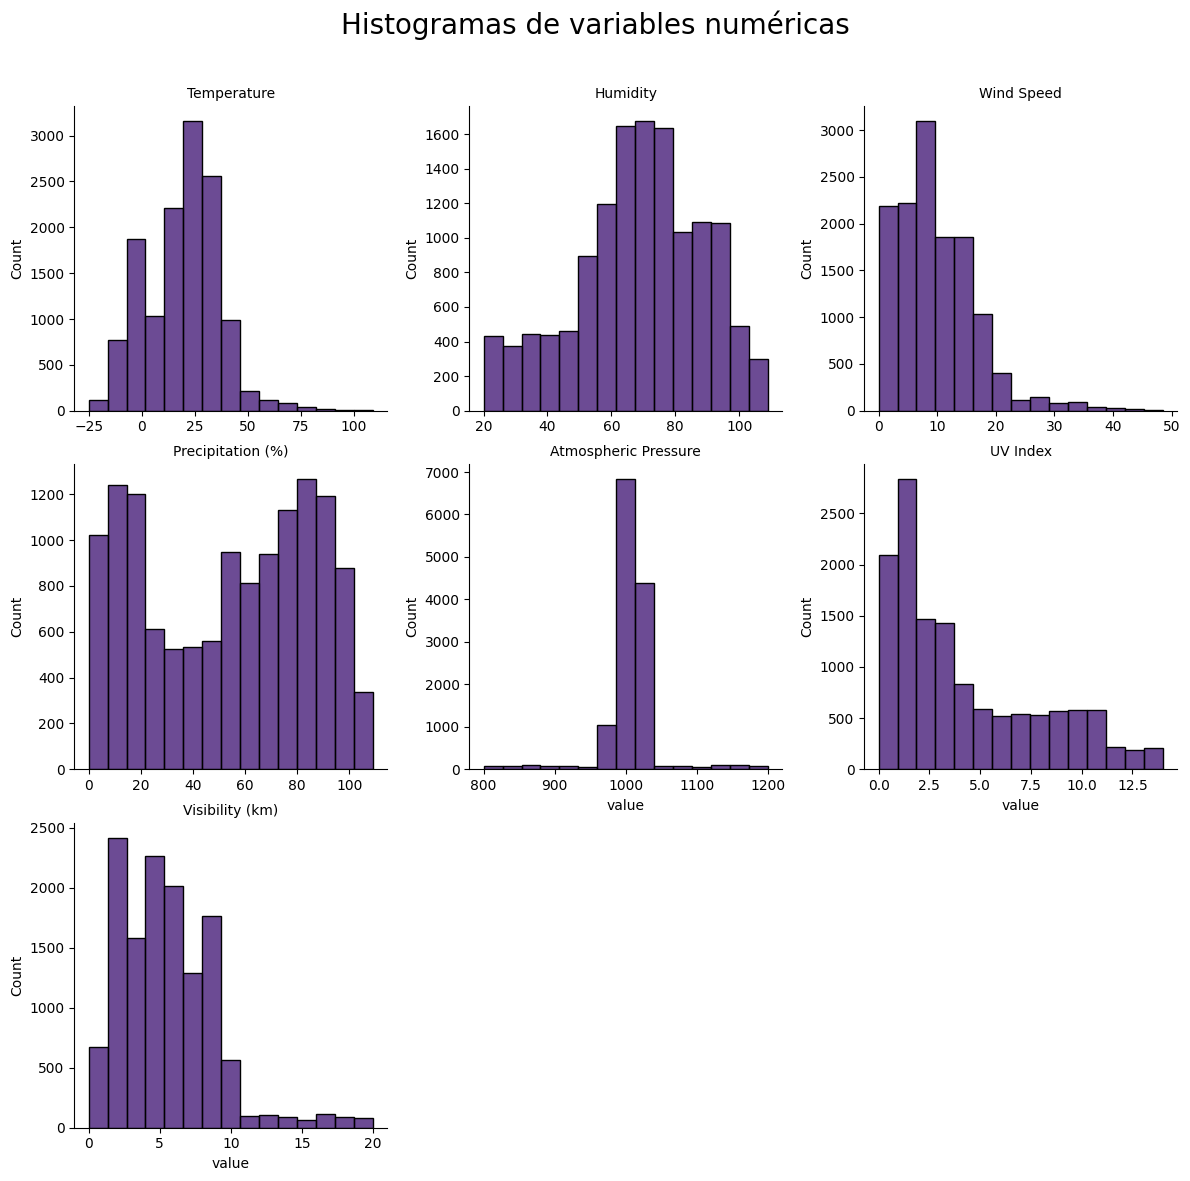

In [ ]:
# Variables Cuantitativas
g = sns.FacetGrid(df_num, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.histplot, x="value", bins=15, color="#3B0F70")
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Histogramas de variables numéricas", fontsize = 20)
plt.show()

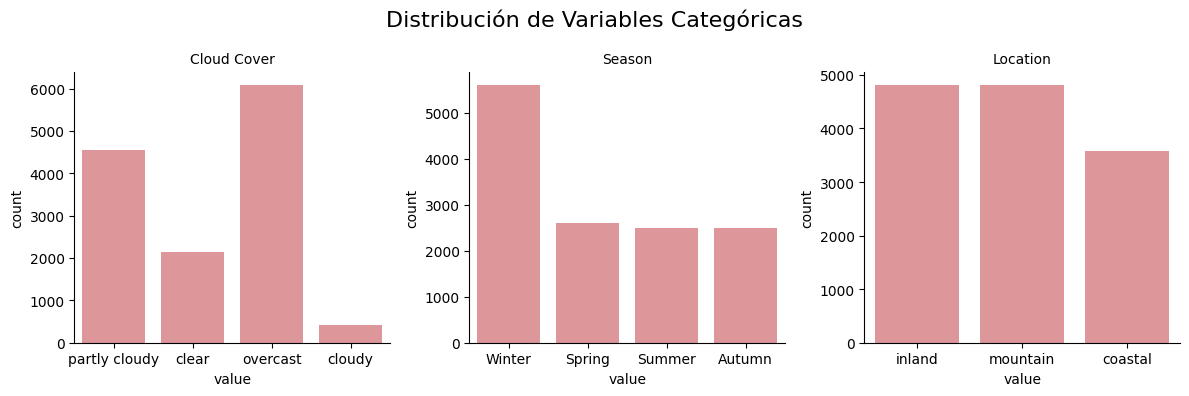

In [ ]:
# Variables categóricas
g = sns.FacetGrid(df_cat, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.countplot, x="value", color="#e98a90")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=0)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de Variables Categóricas", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-13-934410bae0ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


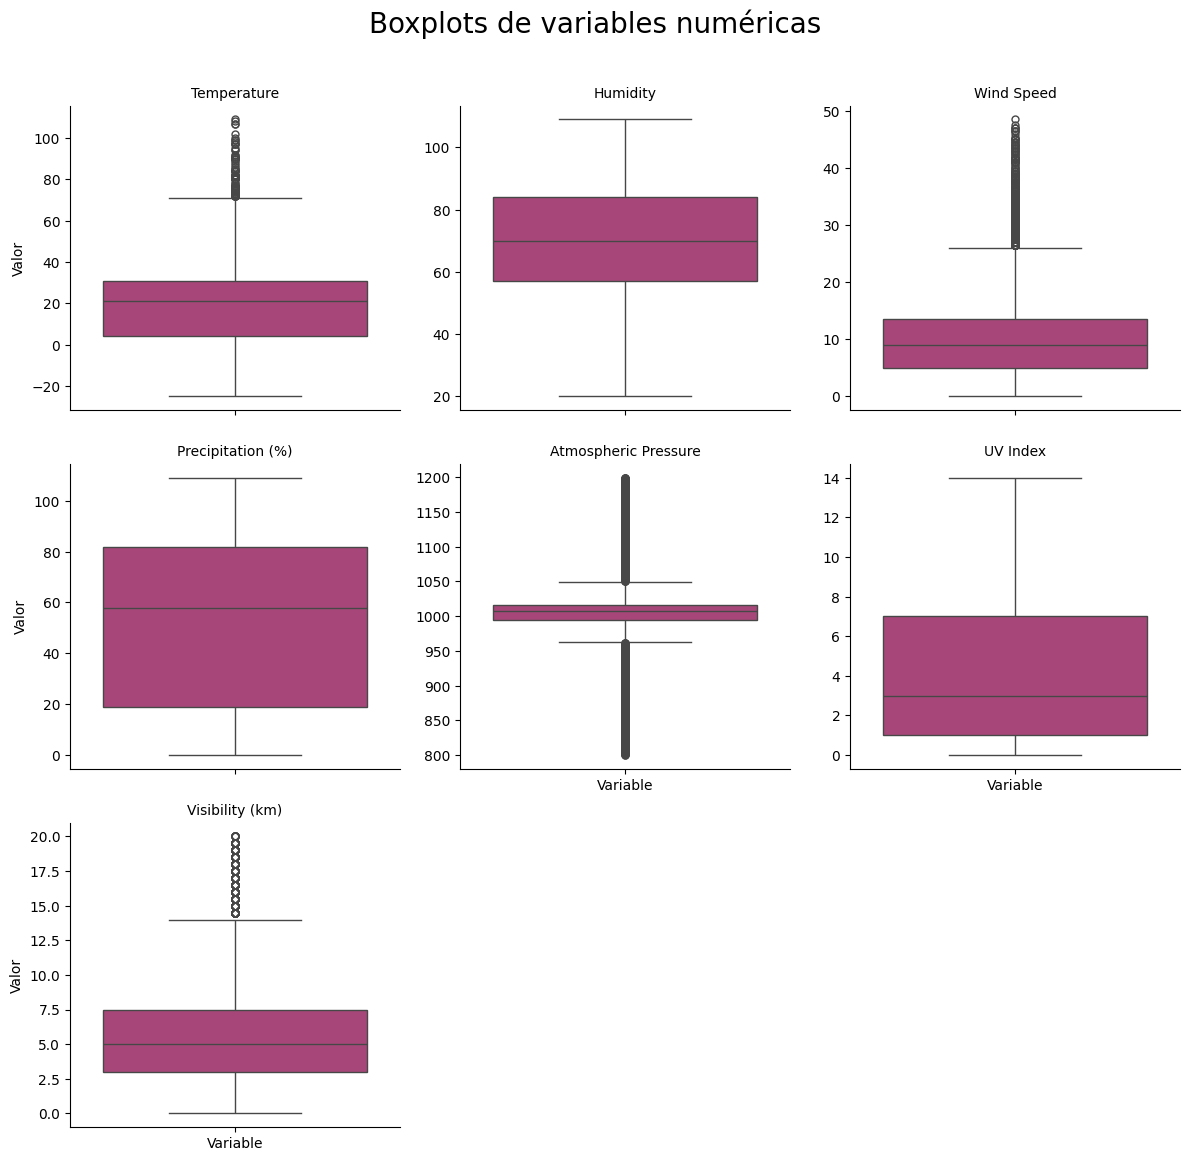

In [ ]:
df_num["x"] = "Variable"
# Gráfico tipo faceta con posición X fija
g = sns.catplot(
    data=df_num, x="x", y="value",
    kind="box", col="variable", col_wrap=3,
    sharey=False, height=4, palette="magma"
)

# Ajustes de título y ejes
g.set_titles("{col_name}")
g.set_axis_labels("", "Valor")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Boxplots de variables numéricas", fontsize=20)
plt.show()


## 1.6. Análisis Multivariado

<ipython-input-14-f68549545ea9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_num, x='Weather Type', y="value", col="variable", kind="box",


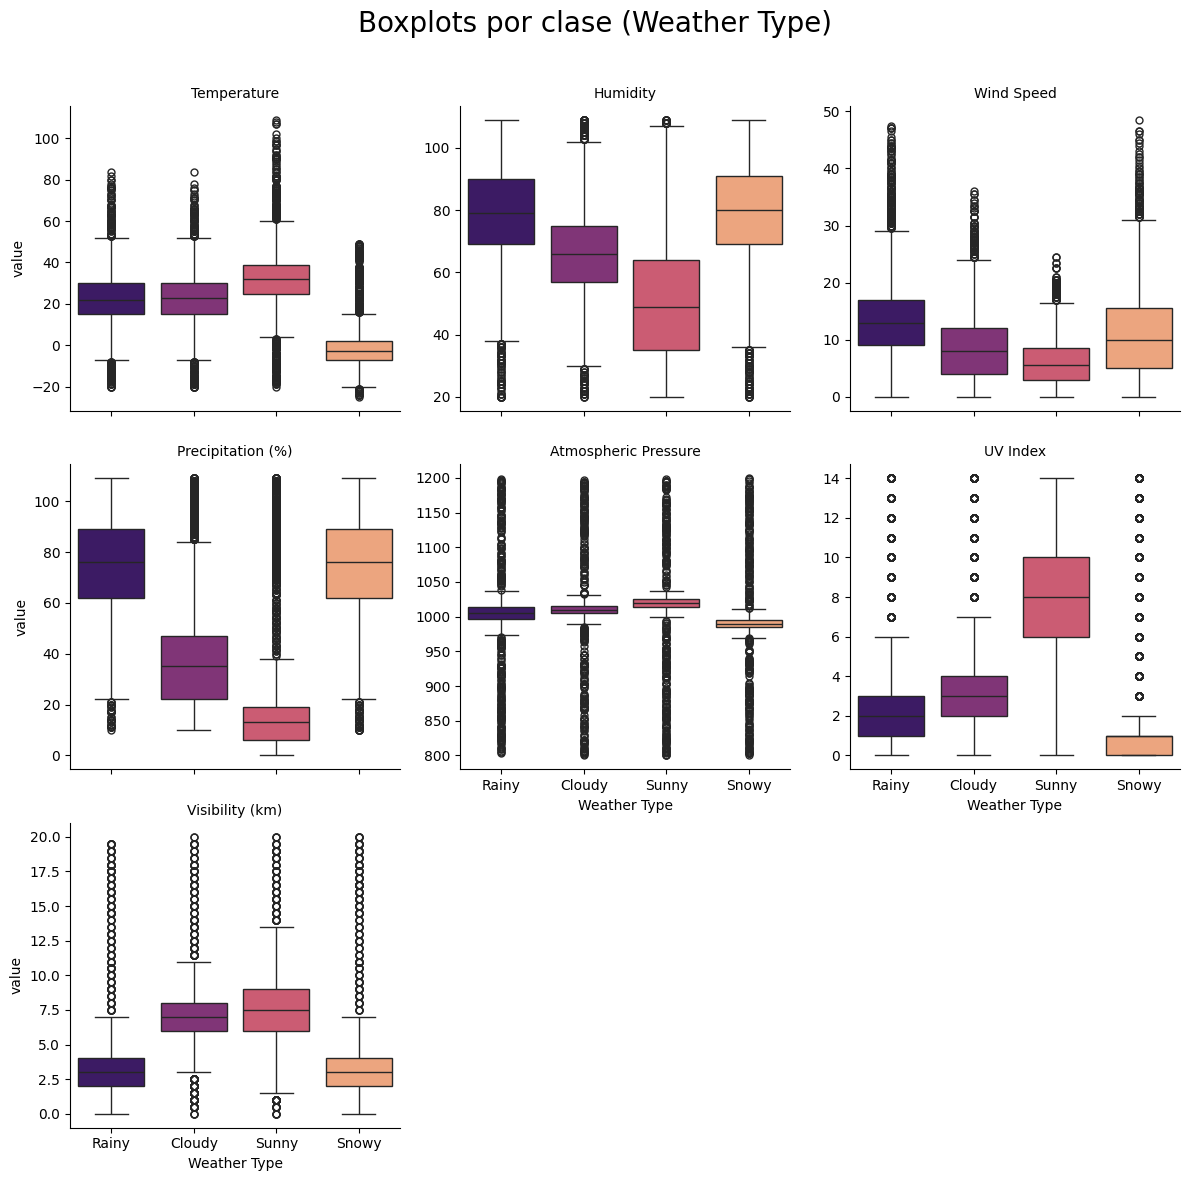

In [ ]:
# Boxplots por clase
g = sns.catplot(data=df_num, x='Weather Type', y="value", col="variable", kind="box",
                col_wrap=3, sharey=False, height=4, palette="magma")
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Boxplots por clase (Weather Type)", fontsize=20)
plt.show()


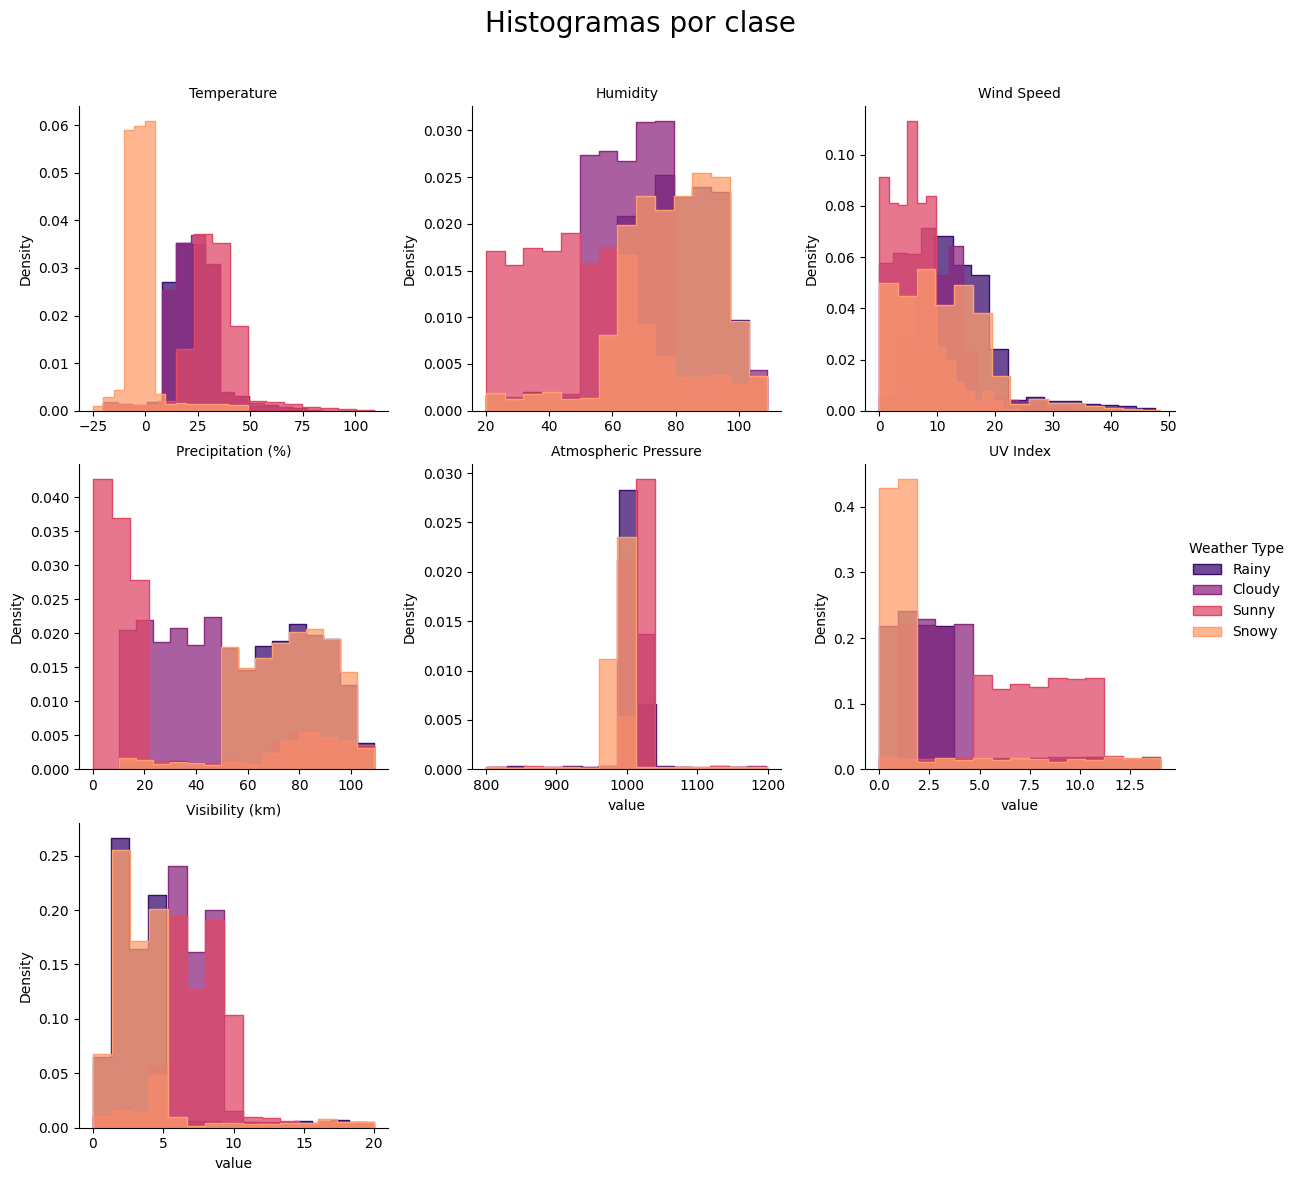

In [ ]:
# Histogramas por clase (superpuestos)
g = sns.FacetGrid(df_num, col="variable", col_wrap=3, height=4, sharex=False, sharey=False, hue='Weather Type', palette="magma")
g.map_dataframe(sns.histplot, x="value", bins=15, element="step", stat="density", common_norm=False, multiple="dodge")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Histogramas por clase", fontsize=20)
plt.show()

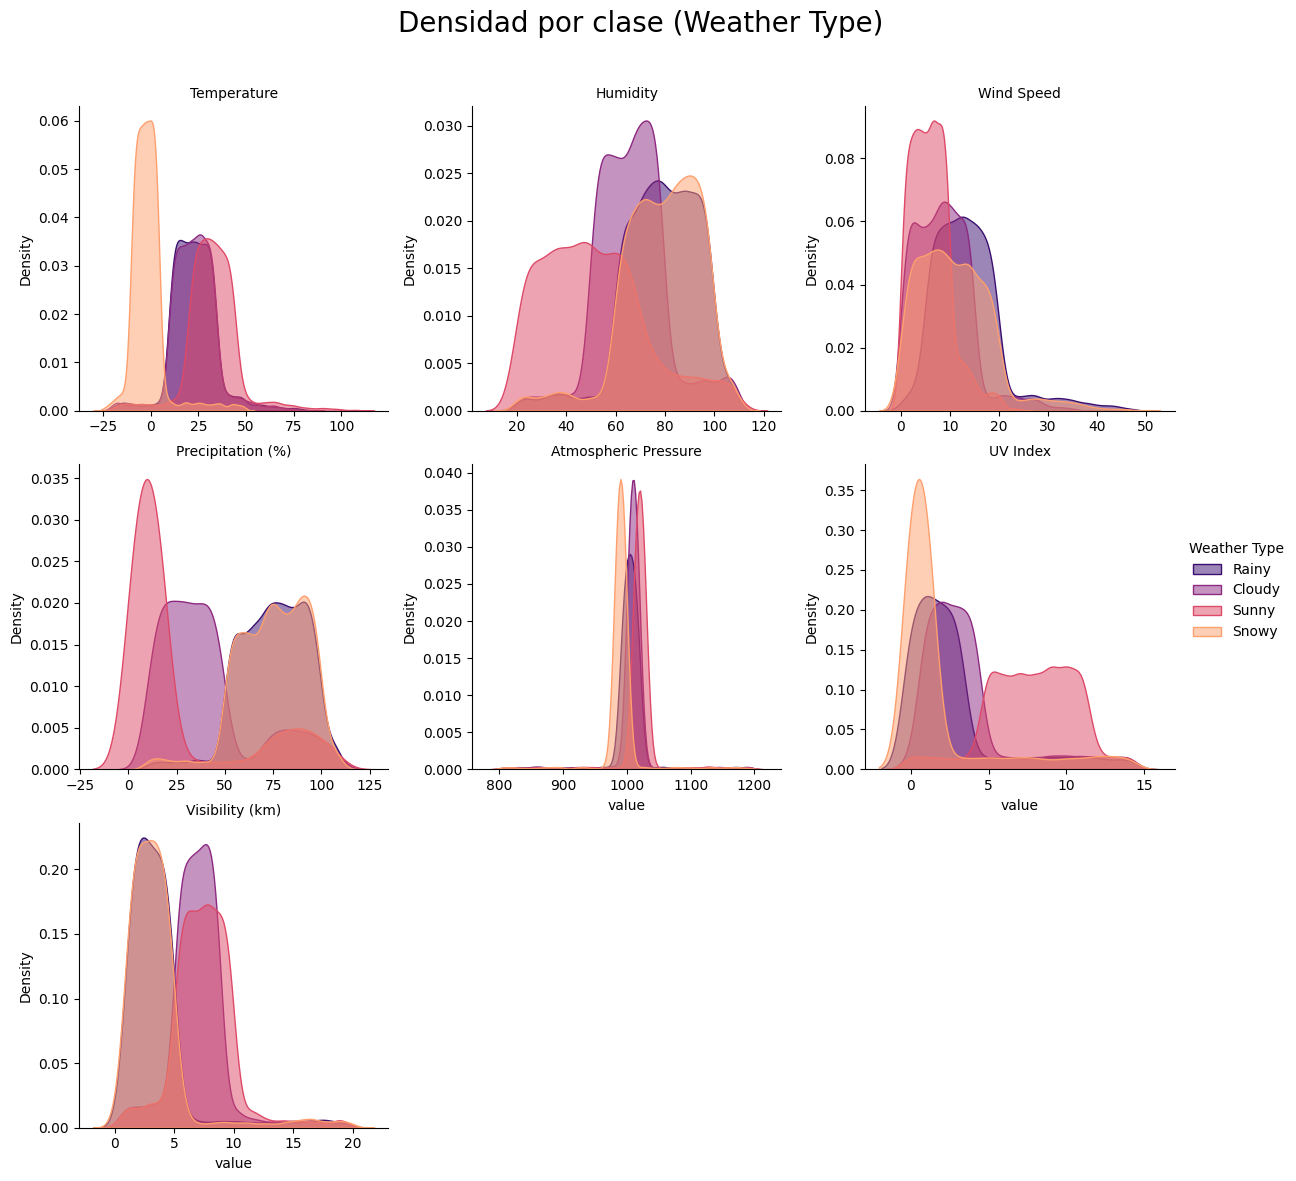

In [ ]:
# Densidades por clase
g = sns.FacetGrid(df_num, col="variable", col_wrap=3, height=4, sharex=False, sharey=False, hue='Weather Type', palette="magma")
g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=0.5)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Densidad por clase (Weather Type)", fontsize=20)
plt.show()


## 1.7. Variable objetivo

In [ ]:
print("\nDistribución de la variable objetivo (Weather Type):")
print(df['Weather Type'].value_counts())

print("\nProporción de clases:")
print(df['Weather Type'].value_counts(normalize=True))



Distribución de la variable objetivo (Weather Type):
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

Proporción de clases:
Weather Type
Rainy     0.25
Cloudy    0.25
Sunny     0.25
Snowy     0.25
Name: proportion, dtype: float64


<ipython-input-30-cb6fd9a74ba7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather Type', palette='magma')


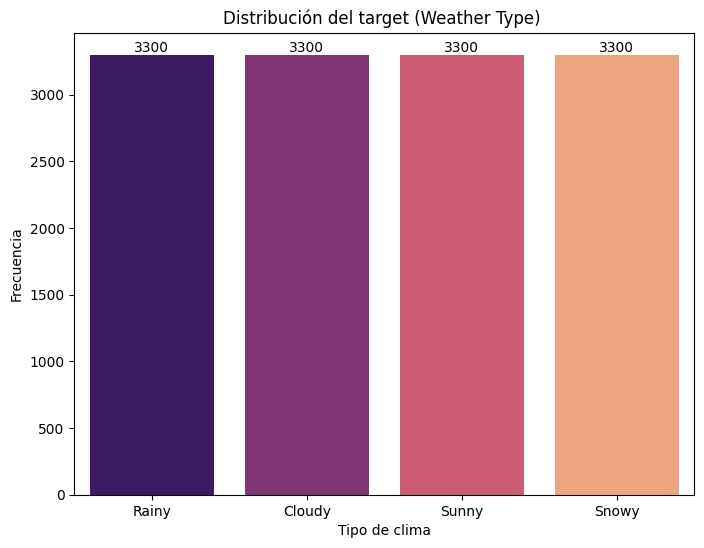

In [ ]:
# Visualización de la variable objetivo
counts = df['Weather Type'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Weather Type', palette='magma')
plt.title('Distribución del target (Weather Type) ')
plt.xlabel("Tipo de clima")
plt.ylabel("Frecuencia")
for index, count in enumerate(counts):
    plt.text(index, count + 1, str(count), ha='center', va='bottom')
plt.show()

## 1.8. Visualización de relaciones entre variables

Matriz correlación

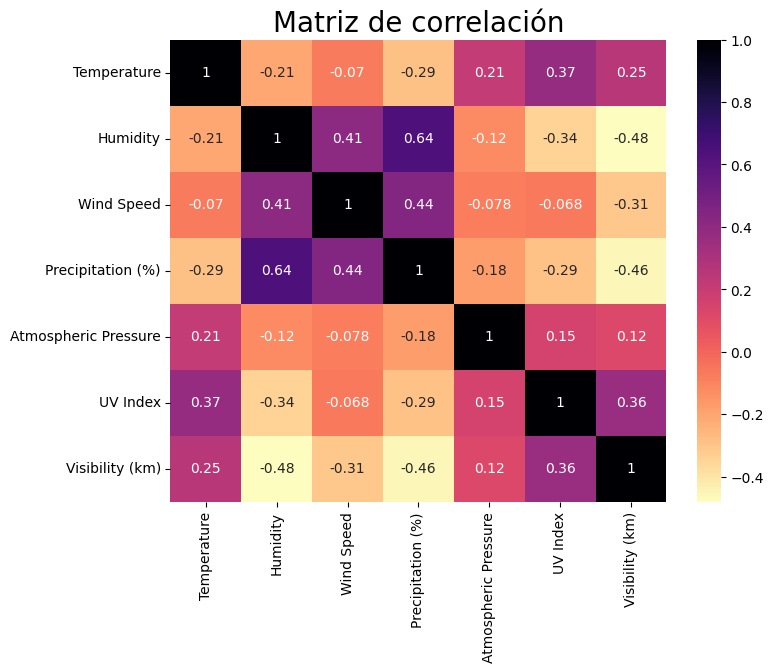

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='magma_r')
plt.title("Matriz de correlación", fontsize=20)
plt.show()


# 2. Modelado y Evaluación

In [ ]:
# Librerías para modelos, métricas y procesamiento
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Partición en conjunto de entrenamiento y prueba

In [ ]:
# Variables predictoras (X) y objetivo (y)
X = df.drop("Weather Type", axis=1)
y = df["Weather Type"]
print(X.head())

In [ ]:
X = pd.get_dummies(X)
print(X.head())

In [ ]:
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)


In [ ]:
print("\nDimensiones de la data train: \n", X_train.shape)
print("\nDimensiones de la data test: \n", X_test.shape)


Dimensiones de la data train: 
 (10560, 10)

Dimensiones de la data test: 
 (2640, 10)


## 2.1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Ajuste de hiperparámetros

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Crear modelo base
rf = RandomForestClassifier(random_state=42)

# Ajuste de hiperparámetros
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Convertir resultados a DataFrame
results = pd.DataFrame(grid_rf.cv_results_)

# Filtrar y mostrar solo columnas relevantes
summary = results[[
    'param_n_estimators',
    'param_max_depth',
    'param_min_samples_split',
    'mean_test_score'
]].sort_values(by='mean_test_score', ascending=False)

# Renombrar columnas para presentación
summary.columns = ['n_estimators', 'max_depth', 'min_samples_split', 'mean_accuracy']

# Mostrar todas las combinaciones ordenadas
print("Resultados de todas las combinaciones:")
display(summary)

# Mostrar los resultados
print("Resultados del ajuste de hiperparámetros para Random Forest:")
print("Mejores hiperparámetros encontrados:", grid_rf.best_params_)
print("Mejor score de validación cruzada:", grid_rf.best_score_)

Resultados de todas las combinaciones:


,n_estimators,max_depth,min_samples_split,mean_accuracy
16,100,10,5,0.917045
15,50,10,5,0.916761
3,50,None,5,0.916193
17,200,10,5,0.916098
13,100,10,2,0.916004
4,100,None,5,0.915814
12,50,10,2,0.915720
0,50,None,2,0.915530
1,100,None,2,0.915341
2,200,None,2,0.915341


Evaluación de indicadores

Resultados del ajuste de hiperparámetros para Random Forest:
Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Mejor score de validación cruzada: 0.9170454545454547


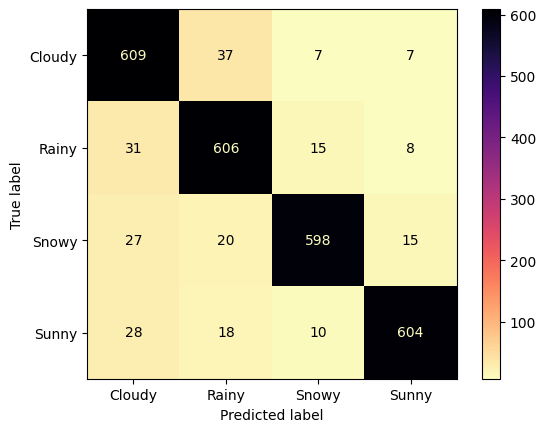

In [ ]:
# Evaluación en el conjunto de prueba
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)


# Mostrar matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='magma_r')

In [ ]:
# Calcular métricas agregadas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f" Accuracy: {accuracy_rf:.4f}")
print(f" Precision (ponderada): {precision_rf:.4f}")
print(f" Recall (ponderado): {recall_rf:.4f}")
print(f" F1-score (ponderado): {f1_rf:.4f}")

# no se ve afectado tanto por el desbalance de clases

 Accuracy: 0.9155
 Precision (ponderada): 0.9170
 Recall (ponderado): 0.9155
 F1-score (ponderado): 0.9158


## 2.2. Regresión Logística

Ajuste de hiperparámetros

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']  # ambos soportan l2
}

lr = LogisticRegression(max_iter=1000)

# Búsqueda con validación cruzada
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search_lr.fit(X_train, y_train)

# Resultados a DataFrame
results_lr = pd.DataFrame(grid_search_lr.cv_results_)

# Seleccionar columnas importantes
summary_lr = results_lr[[
    'param_C', 'param_penalty', 'param_solver', 'mean_test_score'
]].sort_values(by='mean_test_score', ascending=False)

# Renombrar columnas para mejor presentación
summary_lr.columns = ['C', 'penalty', 'solver', 'mean_accuracy']

# Mostrar resumen
print(" Resultados de todas las combinaciones para Regresión Logística:")
display(summary_lr)

# Mostrar los resultados
print("Resultados del ajuste de hiperparámetros para Regresión Logística:")
print("Mejores hiperparámetros encontrados:", grid_search_lr.best_params_)
print("Mejor score de validación cruzada:", grid_search_lr.best_score_)

 Resultados de todas las combinaciones para Regresión Logística:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,C,penalty,solver,mean_accuracy
1,0.01,l2,lbfgs,0.861648
0,0.01,l2,liblinear,0.857860
2,0.10,l2,liblinear,0.850379
4,1.00,l2,liblinear,0.849716
6,10.00,l2,liblinear,0.848958
3,0.10,l2,lbfgs,0.847727
5,1.00,l2,lbfgs,0.847727
7,10.00,l2,lbfgs,0.847254


Resultados del ajuste de hiperparámetros para Regresión Logística:
Mejores hiperparámetros encontrados: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor score de validación cruzada: 0.8616477272727272


Evaluación de indicadores

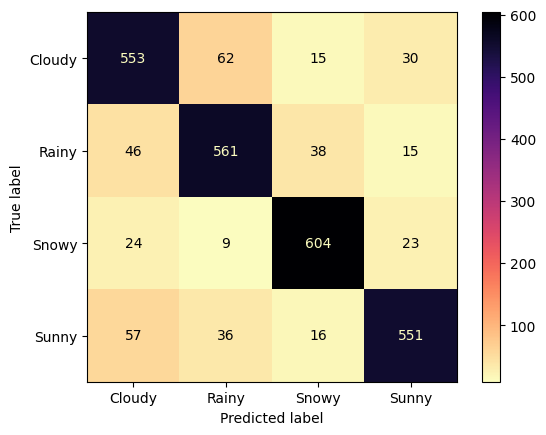

In [ ]:
# Evaluación en el conjunto de prueba
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Mostrar matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test, cmap='magma_r')

In [ ]:
# Calcular métricas agregadas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f" Accuracy: {accuracy_lr:.4f}")
print(f" Precision (ponderada): {precision_lr:.4f}")
print(f" Recall (ponderado): {recall_lr:.4f}")
print(f" F1-score (ponderado): {f1_lr:.4f}")

# no se ve afectado tanto por el desbalance de clases

 Accuracy: 0.8595
 Precision (ponderada): 0.8602
 Recall (ponderado): 0.8595
 F1-score (ponderado): 0.8595


## 2.4. KNN  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd

Ajuste de hiperparámetros

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros para KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Crear modelo base KNN
knn = KNeighborsClassifier()

# Ajuste de hiperparámetros con validación cruzada
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# Convertir resultados a DataFrame
results_knn = pd.DataFrame(grid_knn.cv_results_)

# Filtrar y mostrar solo columnas relevantes
summary_knn = results_knn[[
    'param_n_neighbors',
    'param_weights',
    'param_metric',
    'mean_test_score'
]].sort_values(by='mean_test_score', ascending=False)

# Renombrar columnas para presentación
summary_knn.columns = ['n_neighbors', 'weights', 'metric', 'mean_accuracy']

print("📋 Resultados de todas las combinaciones para KNN:")
display(summary_knn)

# Mostrar los mejores hiperparámetros y score
print(" Resultados del ajuste de hiperparámetros para KNN:")
print("Mejores hiperparámetros encontrados:", grid_knn.best_params_)
print("Mejor score de validación cruzada:", grid_knn.best_score_)


📋 Resultados de todas las combinaciones para KNN:


,n_neighbors,weights,metric,mean_accuracy
14,9,uniform,manhattan,0.893655
15,9,distance,manhattan,0.892708
12,7,uniform,manhattan,0.892330
13,7,distance,manhattan,0.892140
10,5,uniform,manhattan,0.891667
9,3,distance,manhattan,0.891572
8,3,uniform,manhattan,0.891477
11,5,distance,manhattan,0.890625
4,7,uniform,euclidean,0.890530
5,7,distance,euclidean,0.889773


 Resultados del ajuste de hiperparámetros para KNN:
Mejores hiperparámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Mejor score de validación cruzada: 0.8936553030303032


Evaluación de indicadores

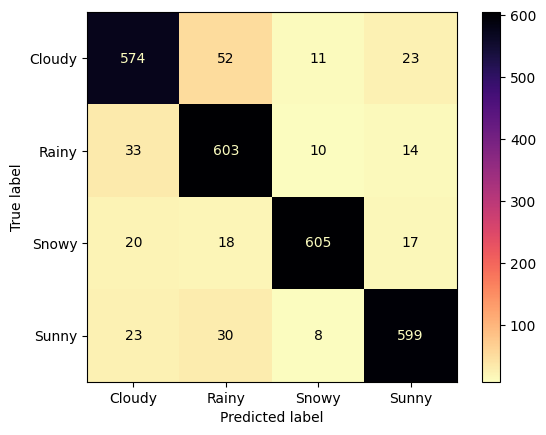

In [ ]:
# Evaluación en el conjunto de prueba
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Mostrar matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap='magma_r')

In [ ]:
# Calcular métricas agregadas
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f" Accuracy: {accuracy_knn:.4f}")
print(f" Precision (ponderada): {precision_knn:.4f}")
print(f" Recall (ponderado): {recall_knn:.4f}")
print(f" F1-score (ponderado): {f1_knn:.4f}")

# no se ve afectado tanto por el desbalance de clases

 Accuracy: 0.9019
 Precision (ponderada): 0.9031
 Recall (ponderado): 0.9019
 F1-score (ponderado): 0.9022


Conclusión

In [ ]:
# Supongamos que ya tienes estos valores calculados
metrics_rf = {
    'Modelo': 'Random Forest',
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf
}

metrics_knn = {
    'Modelo': 'KNN',
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn
}

metrics_lr = {
    'Modelo': 'Regresión Logística',
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr
}

# Crear DataFrame con los tres modelos
tabla_resultados = pd.DataFrame([metrics_rf, metrics_knn, metrics_lr])

# Mostrar la tabla ordenada por Accuracy
tabla_resultados = tabla_resultados.sort_values(by='Accuracy', ascending=False)

# Mostrar resultados
print("Comparación de modelos:")
display(tabla_resultados)

📊 Comparación de modelos:


,Modelo,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.915530,0.917004,0.915530,0.915842
1,KNN,0.901894,0.903098,0.901894,0.902162
2,Regresión Logística,0.859470,0.860169,0.859470,0.859522
